# Name - AMIT KUMAR
# GRIPAPRIL21
# Data Science & Business Analytics Tasks
# Task-3:Exploratory Data Analysis - Retail

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
#loading dataset
df=pd.read_csv('SampleSuperstore.csv')

In [40]:
#lookig at few records of data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [41]:
#checking how many rows and columns are there in the data
df.shape

(9994, 13)

In [42]:
#checking if there are any null values present in the data
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [43]:
#grouping the data on various features of the data to get more clear insights
seg=df.groupby('Segment')
city=df.groupby('City')
state=df.groupby('State')
reg=df.groupby('Region')
cat=df.groupby('Category')
sub=df.groupby('Sub-Category')

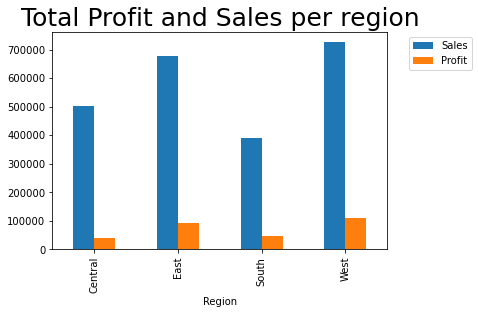

In [44]:
#visualisation of how profit and sales varies according to different regions
reg['Sales','Profit'].agg('sum').plot.bar()
plt.title('Total Profit and Sales per region',size=25)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

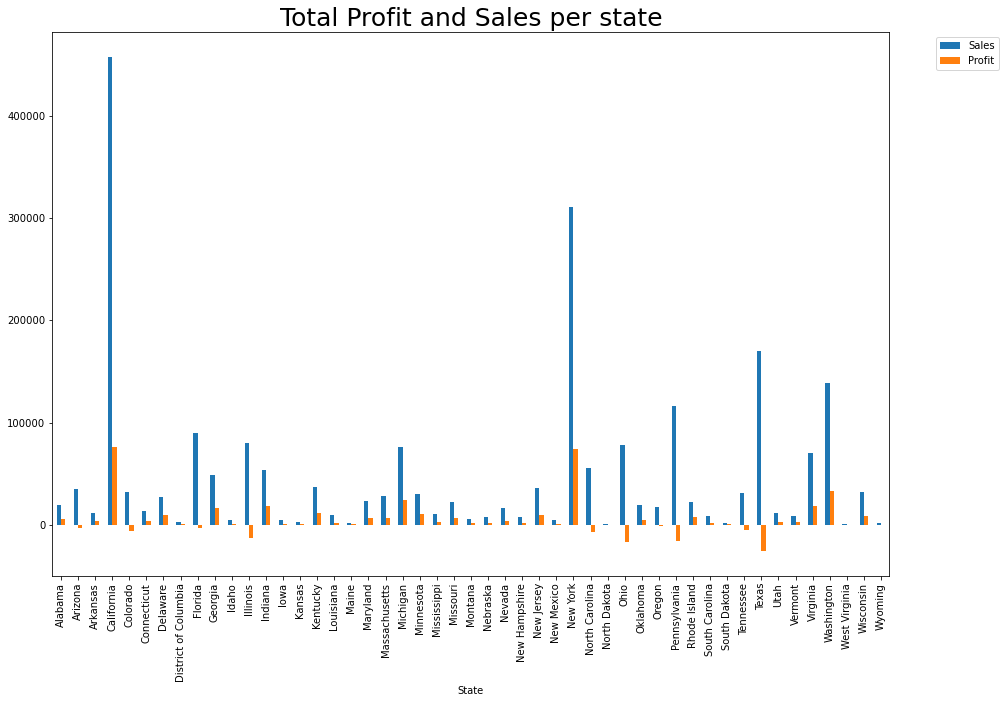

In [45]:
#visualisation of how profit and sales varies according to different states
state['Sales','Profit'].agg('sum').plot(kind='bar',figsize=(15,10))
plt.title('Total Profit and Sales per state',size=25)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

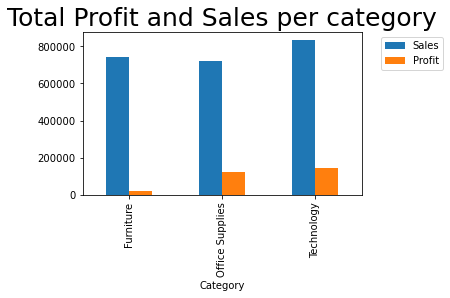

In [46]:
#visualisation of how profit and sales varies according to different categories of products
cat['Sales','Profit'].agg('sum').plot(kind='bar',figsize=(5,3))
plt.title('Total Profit and Sales per category',size=25)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

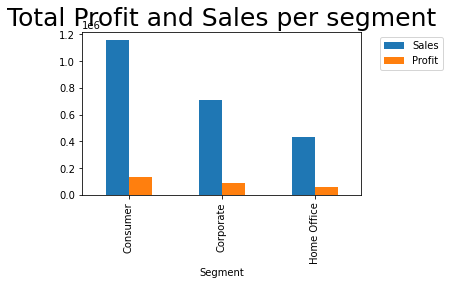

In [47]:
#visualisation of how profit and sales varies according to different segements of products
seg['Sales','Profit'].agg('sum').plot(kind='bar',figsize=(5,3))
plt.title('Total Profit and Sales per segment',size=25)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

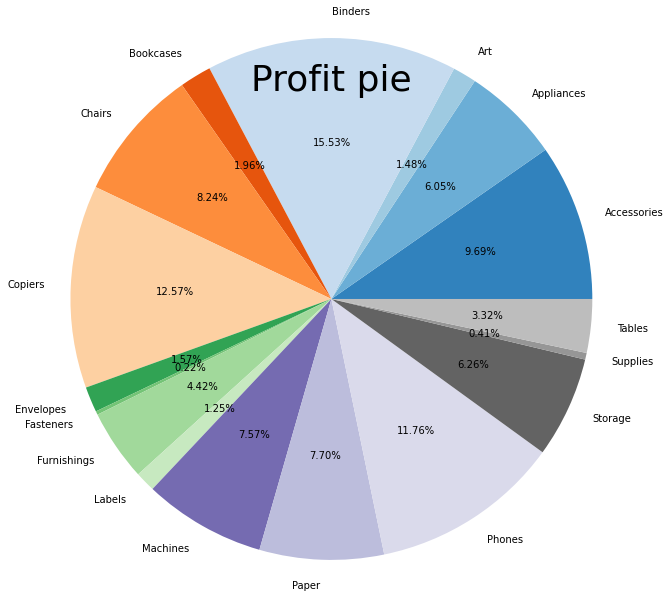

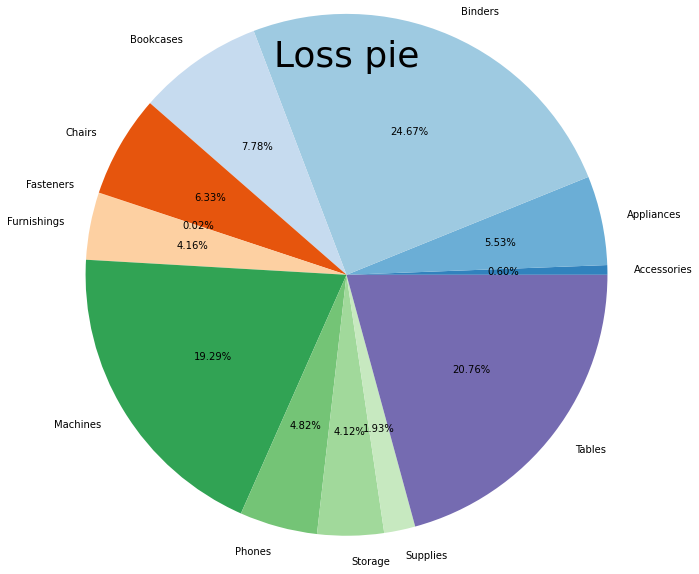

In [48]:
#visualisation of profit and loss share of differnt products
from matplotlib import cm
profit=df[df.Profit>0]
loss=df[df.Profit<0]
colors = cm.tab20c(np.arange(17)/17.)
# percentage share of total profit by each sub-category
plt.pie(profit.groupby('Sub-Category').agg('sum').Profit,radius=3.0,labels=profit.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%',colors =colors)
plt.title('Profit pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()

# percentage share of total loss by each sub-category
plt.pie(np.abs(loss.groupby('Sub-Category').agg('sum').Profit),radius=3.0,labels=loss.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%',colors =colors)
plt.title('Loss pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()
#by looking at the profit pie we can increase the supplies of those items which are giving high profit
#by looking at the loss pie we can decrease the supplies of those items which are giving high loss

In [35]:
#checking which cities are in huge loss so that we can pay more attention to those to reduce overall losses
loss=df[df.Profit<0]
city_loss=loss.groupby('City').agg('sum').Profit
print("Cities with highest  losses:")
print(city_loss.nsmallest(20))

Cities with highest  losses:
City
Philadelphia    -19590.7411
Houston         -14785.3668
Chicago         -11120.6271
San Antonio      -7831.0254
Lancaster        -7632.4946
Burlington       -5999.3318
Dallas           -4208.5218
Jacksonville     -4059.9857
New York City    -3966.0226
Louisville       -3694.1045
Phoenix          -3613.6298
Aurora           -3405.8590
Newark           -3176.8002
Springfield      -3168.2228
Columbus         -2017.8867
Concord          -1886.6064
Miami            -1885.6832
Charlotte        -1770.6737
Memphis          -1747.2408
Rockford         -1383.9134
Name: Profit, dtype: float64


In [36]:
#checking which states are in huge loss so that we can pay more attention to those to reduce overall losses
loss=df[df.Profit<0]
state_loss=loss.groupby('State').agg('sum').Profit
print("States with highest  losses:")
print(state_loss.nsmallest(20))

States with highest  losses:
State
Texas            -36813.1875
Ohio             -21750.0002
Pennsylvania     -21602.8515
Illinois         -19501.6975
North Carolina   -11557.9854
Colorado          -8900.9048
Florida           -8689.8295
Tennessee         -7257.0174
Arizona           -6656.7675
New York          -5031.1378
California        -3769.6651
Oregon            -2890.4764
Massachusetts      -566.2617
Washington         -387.8706
Rhode Island       -230.1678
Nevada             -109.5822
New Hampshire      -105.3164
Delaware            -85.8963
West Virginia       -76.9536
Maryland            -71.1170
Name: Profit, dtype: float64
